<a href="https://colab.research.google.com/github/SammriddhGupta/ML-web-app/blob/main/LHD_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/cleaned_data.csv")
train_df.head()

,id,city,state,bathrooms,bedrooms,livingArea,lotArea,lotUnit,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income
0,0,Justin,TX,3.0,4.0,3078.0,7492.32,sqft,358100.0,0,0,1,0,46658.0
1,1,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,sqft,660000.0,0,0,1,0,57188.0
2,2,Anchorage,AK,2.0,3.0,1388.0,0.00,sqft,232500.0,1,0,0,0,66044.0
3,3,Berwick,ME,4.0,3.0,2972.0,79714.80,acres,551900.0,0,0,1,0,46016.0
4,4,Thornton,CO,3.0,2.0,1926.0,0.00,sqft,435000.0,0,0,0,1,65217.0


In [3]:
average_price = train_df['price'].mean()

In [4]:
average_price

335720.26146307314

In [10]:
mean_model_df = train_df.copy()

mean_model_df['predicted'] = 335720

mean_model_df['absolute_error'] = np.abs(mean_model_df['price'] - mean_model_df['predicted'])

In [11]:
mean_model_df['absolute_error'].mean()

141006.19828491425

(array([8524., 7274., 4223., 1634.,  563.,  325.,  198.,   75.,   27.,
          13.]),
 array([8.0000e+01, 8.6500e+04, 1.7292e+05, 2.5934e+05, 3.4576e+05,
        4.3218e+05, 5.1860e+05, 6.0502e+05, 6.9144e+05, 7.7786e+05,
        8.6428e+05]),
 <a list of 10 Patch objects>)

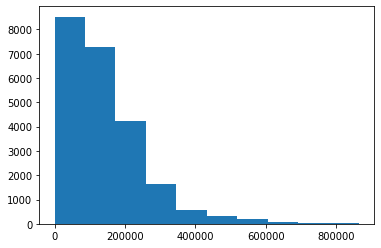

In [12]:
plt.hist(mean_model_df['absolute_error'])

In [13]:
square_footage_model_df = train_df.copy()

In [14]:
average_price_per_square_foot = (square_footage_model_df['price'] / square_footage_model_df['livingArea']).mean()
average_price_per_square_foot

195.35527446966984

In [15]:
square_footage_model_df['predicted'] = 195 * square_footage_model_df['livingArea']

np.abs(square_footage_model_df['predicted'] - square_footage_model_df['price']).mean()

118050.60773238014

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg_df = train_df.copy()

In [20]:
linear_regression_with_living_area_model = LinearRegression()

input_data = lin_reg_df[['livingArea']]
output_data = lin_reg_df['price']

linear_regression_with_living_area_model.fit(input_data, output_data)

LinearRegression()

In [21]:
lin_reg_df['predicted'] = linear_regression_with_living_area_model.predict(input_data)

(np.abs(lin_reg_df['predicted'] - lin_reg_df['price'])).mean()

110781.26218261379

In [22]:
# calculating mean absolute error 

from sklearn.metrics import mean_absolute_error

mean_absolute_error(lin_reg_df['predicted'] , lin_reg_df['price'] )

110781.26218261366

In [ ]:
# yay both the above cells give the same results so we're on the right path

In [ ]:
# way to add capacity to our model is add non-linear version of our data

In [24]:
lin_reg_df['livingAreaSquared'] = lin_reg_df['livingArea'] ** 2
lin_reg_df['livingAreaRooted'] = lin_reg_df['livingArea'] ** 0.5

input_data = lin_reg_df[['livingArea' , 'livingAreaSquared' , 'livingAreaRooted']]
output_data = lin_reg_df['price']

linear_regression_with_living_area_model.fit(input_data, output_data)

lin_reg_df['predicted'] = linear_regression_with_living_area_model.predict(input_data)

mean_absolute_error(lin_reg_df['predicted'], lin_reg_df['price'])

110734.39977210909

In [26]:
# so this didn't really help let's try a bit more 

columns = ['livingArea' , 'livingAreaSquared' , 'livingAreaRooted']

for i in range(2,5):
  column = f'livingAreaToThePowerOf{i}'
  columns.append(column)
  lin_reg_df[column] = lin_reg_df['livingArea'] ** i

input_data = lin_reg_df[columns]
output_data = lin_reg_df['price']

linear_regression_with_powers_model = LinearRegression()

linear_regression_with_powers_model.fit(input_data, output_data)

lin_reg_df['predicted']  = linear_regression_with_powers_model.predict(input_data)

mean_absolute_error(lin_reg_df['predicted'], lin_reg_df['price'])

110711.49343302738

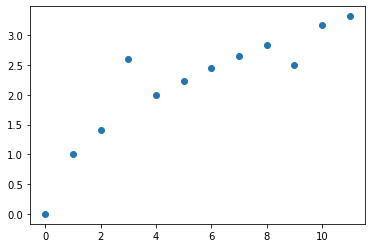

In [29]:
# making up some fake data to understand the problem of overfitting

fake_data = pd.DataFrame({
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    # 'y': [-3, 14, 16, 9, 12, 14, 39, 63]
    'y': [0.0, 1.0, 1.4142135623730951, 2.6, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 2.5, 3.1622776601683795, 3.3166247903554]
})

plt.scatter(fake_data['x'], fake_data['y'])

In [30]:
columns = ['x']
predicted_columns = []
for i in range(1,10):
    column = f'xToThePowerOf{i}'
    columns.append(column)
    fake_data[column] = fake_data['x'] ** i
    model = LinearRegression()
    model.fit(fake_data[columns], fake_data['y'])
    predicted_column = f'predictedFrom{i}'
    predicted_columns.append(predicted_column)
    fake_data[predicted_column] = model.predict(fake_data[columns])

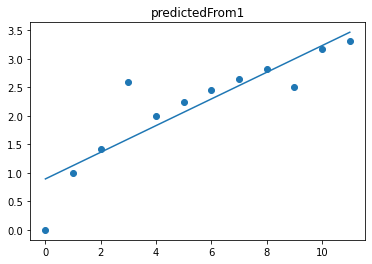

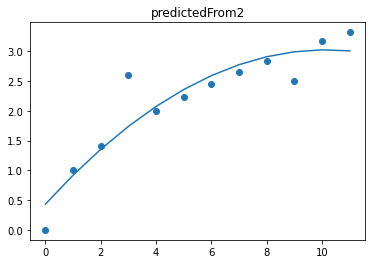

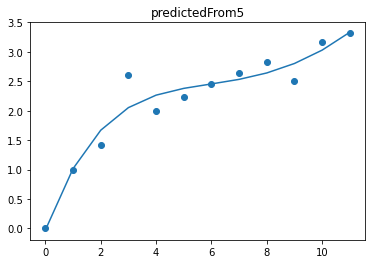

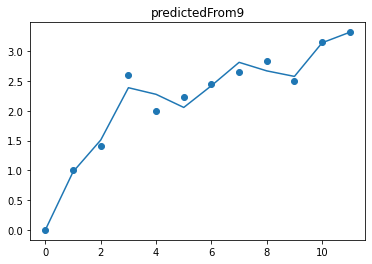

In [31]:
for predicted_column in ['predictedFrom1', 'predictedFrom2', 'predictedFrom5', 'predictedFrom9']:
    plt.title(predicted_column)
    plt.scatter(fake_data['x'], fake_data['y'])
    plt.plot(fake_data[predicted_column])
    plt.show()

In [33]:
# we have split our dataset into train and test sets

from sklearn.model_selection import train_test_split

X = train_df[['livingArea']]
y = train_df['price']

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=.2 , random_state=42)

print(X_train)

X_test

       livingArea
22195      1464.0
11288      2312.0
3481       1520.0
18786      1204.0
1357       2086.0
...           ...
11964      2054.0
21575      1476.0
5390       1200.0
860        1100.0
15795      1202.0

[18284 rows x 1 columns]


,livingArea
5504,1343.0
8064,1724.0
19269,2165.0
14582,1143.0
4222,2760.0
...,...
19540,1425.0
7029,940.0
17746,1518.0
17181,1040.0


In [36]:
#running the linear regression model on test data

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_absolute_error(predictions, y_test)

109501.57384495749

In [39]:
# Performing cross validation by running it 4 times and putting random state as 'i' 

from sklearn.model_selection import train_test_split

X = train_df[['livingArea']]
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[109306.96102433567, 112630.12515163988, 111747.26282728216, 113210.77059663818]
average error: 111723.77989997398


In [ ]:
# now, our predictions are getting worse with each successive run 
# this is the exact problem of overfitting
# we can solve overfitting by 
# (1) cross validation as we did above 
# (2) test your data on data other than what you worked on  
# (3) change values around   (4) add noise   (5) add more data

In [41]:
# now instead of just a piece of data i.e the train set, we load in our entire dataset for the model to run on

X = train_df.drop(['city', 'state' , 'lotUnit' , 'price'], axis=1)
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[97531.97861551556, 100374.1699967339, 98707.07455700553, 100856.53908684057]
average error: 99367.4405640239


In [43]:
# now we try to one hot encode state 

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
X

,id,bathrooms,bedrooms,livingArea,lotArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,3.0,4.0,3078.0,7492.32,0,0,1,0,46658.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,5.0,5.0,3722.0,6577.56,0,0,1,0,57188.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2.0,3.0,1388.0,0.00,1,0,0,0,66044.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4.0,3.0,2972.0,79714.80,0,0,1,0,46016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,3.0,2.0,1926.0,0.00,0,0,0,1,65217.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,22851,2.0,3.0,2428.0,7840.80,0,0,1,0,21375.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22852,22852,2.0,3.0,1600.0,3600.00,0,0,1,0,33125.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22853,22853,2.0,3.0,1605.0,6150.00,0,0,1,0,30005.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22854,22854,2.0,2.0,1810.0,8713.00,0,0,1,0,50044.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# now we try to one hot encode state to see if it improves our predictions

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[60100.13077340247, 61513.82309779637, 60453.46716175096, 62175.41108387223]
average error: 61060.70802920551


In [ ]:
# as we can see above, we get a massive improvement from 99000 to 61000 approx  

In [45]:
# exploring a little artificial neural networks
from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = MLPRegressor()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[99027.38848916016, 103103.60922279707, 103562.02100820783, 103476.12549340611]
average error: 102292.2860533928


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [46]:
# so kinda surprisingly, using a neural network doesn't really improve our predictions
# one of the reasons is our data is not normalized
# another point to note is when doing Linear Regression, normalization doesn't help neural networks a lot
# another reason could be that neural networks work better on much more data
# what we can try doing is changing the shape of our neural network, by adding the hidden layers so let's try that

# exploring a little artificial neural networks
from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(1):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = MLPRegressor(hidden_layer_sizes=[20,5])
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[99127.93317217777]
average error: 99127.93317217777


In [48]:
# we run the neural network only once for the sake of simplicity but we immediately notice a slight improvement
from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(1):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = MLPRegressor(hidden_layer_sizes=[40,20,5])
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[98290.42948621223]
average error: 98290.42948621223


In [ ]:
# and there we go, we have made 2 simple models to predict our prices